# **(18th Oct) (RAG(Retrieval-Augmented Generation))**

In [1]:
# Why RAG?
# What is RAG System?
# Overview of RAG Framework?

In [3]:
                  ### Limitation of LLm Model ####
# (i) Limited Knowledge
# (ii) Hallucination

# These are the chunks, thats why we are using RAG.
# when External database is there then LLm model cant work.

In [4]:
# RAG will connect with the External knowledge Base then we have to build own model. 

In [ ]:
# If private data is there,on that data if we are using LLM Model.user will not get correct output.Machine will generate Hallucianation.

In [5]:
                    ### RAG has Two Form ###
# (i) Native RAG  
# (ii) Advance RAG

**Simple ChatBot**

In [21]:
# !pip install langchain_google_genai

In [2]:
import google.generativeai as genai

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI 

f = open('Gemini_API_key.txt')
key = f.read()
chat_model = ChatGoogleGenerativeAI(api_key=key,model="gemini-1.5-flash")

In [4]:
from langchain_core.prompts import ChatPromptTemplate
prompt_template = ChatPromptTemplate.from_messages([
    ("system", """You are a helpful AI chef Assistant. Given a dish name by user, you can provide the ingredients to prepare
    the dish. Output Format Instructions: {output_format_instructions}"""),
    ("human", "Give me the ingredients for cooking {dish_name}."),])
prompt_template


ChatPromptTemplate(input_variables=['dish_name', 'output_format_instructions'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['output_format_instructions'], input_types={}, partial_variables={}, template='You are a helpful AI chef Assistant. Given a dish name by user, you can provide the ingredients to prepare\n    the dish. Output Format Instructions: {output_format_instructions}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['dish_name'], input_types={}, partial_variables={}, template='Give me the ingredients for cooking {dish_name}.'), additional_kwargs={})])

In [5]:
from langchain_core.output_parsers import CommaSeparatedListOutputParser

csv_output_parser = CommaSeparatedListOutputParser()

In [6]:
chain = prompt_template | chat_model | csv_output_parser

In [7]:
user_input = {"dish_name": "paneer biryani", "output_format_instructions": csv_output_parser.get_format_instructions()}

response = chain.invoke(user_input)

print(response)

['paneer', 'basmati rice', 'onions', 'tomatoes', 'ginger-garlic paste', 'green chilies', 'yogurt', 'garam masala', 'turmeric powder', 'red chili powder', 'coriander powder', 'cumin powder', 'cloves', 'cardamom', 'bay leaves', 'saffron', 'kewra water', 'ghee', 'oil', 'salt']


**Augmented Generation(AG) Based Chatbot**

In [8]:
# Here i am giving the news_article and according to that machine will give response.But that has a 
#                     Limited Knowledge,so here some Hallucination will happen. 

In [9]:
from langchain_core.prompts import ChatPromptTemplate
prompt_template = ChatPromptTemplate.from_messages([
    ("system", """You are a helpful AI Assistannt. Given a user question, you can provide the information to the 
    user about the events as per the below mentioned context. Context: {context}"""),
    ("human", "{question}"),])
prompt_template

ChatPromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template='You are a helpful AI Assistannt. Given a user question, you can provide the information to the \n    user about the events as per the below mentioned context. Context: {context}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})])

In [10]:
# output parser
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()

In [11]:
chain = prompt_template | chat_model | parser

In [12]:
news_article = """ Assembly elections in Maharashtra and Jharkhand in November will, yet again, test the 
mettle of the Bharatiya Janata Party (BJP) and the Congress, and the respective regional parties, just weeks 
after the elections in Haryana and Jammu and Kashmir. By-elections in three Lok Sabha constituencies and 48 
Assembly segments across States have also been announced. The political landscape in Maharashtra has been 
reshaped thoroughly since the 2019 election. The Shiv Sena and the Nationalist Congress Party (NCP) have 
split, with one faction each in alliance with the BJP and the Congress. The ruling Mahayuti, which the BJP 
is a part of, ended up with 17 of 48 seats in the 2024 general election, while the Maha Vikas Aghadi, of 
the Congress, the Uddhav Thackeray faction of the Sena and the Sharad Pawar faction of the NCP, won 29. 
Since then, the ruling alliance has taken several measures to gain more ground. Following the latest 
decision by the outgoing Eknath Shinde-led government hours before the election schedule was announced, 
a complete toll waiver for light motor vehicles was announced. Chastened by the Haryana election results, 
the Congress has toned down its hype in Maharashtra. It has appointed senior leaders to oversee the 
campaign in various regions of the State. In Maharashtra and Jharkhand, the BJP has had its strategy 
in place well in time, overseen by veterans who command authority.
The JMM-led ruling alliance in Jharkhand, which the Congress is a part of, and the Mahayuti are betting on 
women voters to ensure another term. Both governments have introduced cash dole schemes for women. In 
Jharkhand, the BJP campaign is built on corruption allegations against State Chief Minister Hemant 
Soren as well as demographic shifts which the party attributes to the alleged entry of people from 
Bangladesh. Mr. Soren accuses the BJP of misusing central investigating agencies to implicate him. 
He is dependent on tribal consolidation, but that alone is not sufficient. Nearly three-fourths of 
the State’s population are non-tribal, and the BJP’s focus is on consolidating the Hindus among them. 
The tribal population is shrinking, but linking this to Bangladesh while overlooking the issue of 
inter-State migration is a classic BJP playbook tactic. The consolidation of the Other Backward 
Classes, a strategy that worked in its favour in Haryana, is what the BJP is aiming for in Jharkhand 
and Maharashtra. The Congress and its regional allies are at risk of being overdependent on Marathas 
in Maharashtra and tribespeople in Jharkhand.

"""
user_query = "Can you summaries the news for me?"

chain.invoke({"question": user_query, "context": news_article})

'The upcoming Assembly elections in Maharashtra and Jharkhand will be crucial for both the BJP and the Congress, along with regional parties.  \n\n**Maharashtra:** The political landscape has shifted since the 2019 elections, with splits within the Shiv Sena and NCP resulting in two factions each aligning with either the BJP or the Congress. The BJP-led coalition is focusing on consolidating its position through measures like a toll waiver for vehicles. The Congress, however, has toned down its campaign after the Haryana election results. \n\n**Jharkhand:** The ruling coalition, led by the JMM and including the Congress, and the BJP are both targeting women voters through cash dole schemes. The BJP is campaigning on corruption allegations against the Chief Minister and demographic shifts attributed to alleged migration from Bangladesh. The JMM, meanwhile, is relying on tribal consolidation. The BJP is also aiming to consolidate the Other Backward Classes in both states. \n\nBoth the Co

In [13]:
user_query = "How many political party envoled in the upcoming election"

response = chain.invoke({"question": user_query, "context": news_article})
print(response)

The provided text mentions several political parties involved in the upcoming elections in Maharashtra and Jharkhand. Here's a breakdown:

**Maharashtra:**

* **Bharatiya Janata Party (BJP)**
* **Shiv Sena (two factions)** 
    * **Eknath Shinde faction** (allied with BJP)
    * **Uddhav Thackeray faction** (allied with Congress and NCP)
* **Nationalist Congress Party (NCP) (two factions)**
    * **Sharad Pawar faction** (allied with Congress and Uddhav Thackeray faction of Shiv Sena)
    * **Ajit Pawar faction** (allied with BJP)
* **Congress**

**Jharkhand:**

* **Bharatiya Janata Party (BJP)**
* **Jharkhand Mukti Morcha (JMM)** (allied with Congress)
* **Congress**

So, based on the information provided, there are at least **six** major political parties involved in the upcoming elections in Maharashtra and Jharkhand. 



In [14]:
user_query = "How many seat bjp going to win?"

response = chain.invoke({"question": user_query, "context": news_article})
print(response)

I'm sorry, I can't tell you how many seats the BJP will win in the upcoming Maharashtra and Jharkhand elections. 

The provided text gives information about the political landscape and strategies of the BJP and other parties, but it doesn't provide any predictions or specific numbers about the outcome of the elections. 

Election results are influenced by many factors, and it's impossible to predict them with certainty. 



In [46]:
# ---> so here we will get according to this article,machine will generate knowledge.if we will ask beyond to 
#       this article it will nto genearte that means Hallucination happen

In [47]:
#---> here we will create knowledge(data base) based system.And here i will put all the recent news article, 
#      and model(question,context) connected with databse.after that if we will ask any question related 
#        to database it will generate text.

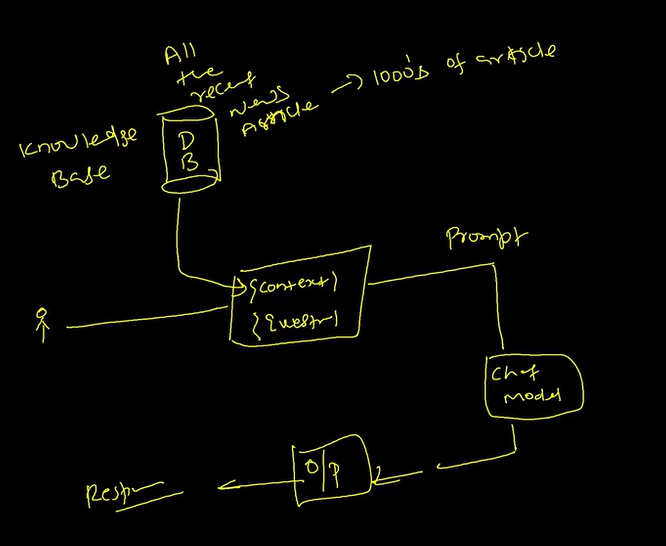

In [48]:
# Upper one is not RAG Based Chatbot.
# This is Augmented Generation(AG) Based Chatbot.


# **RAG**

In [52]:
               #### How you will do it ###

# Idea : - Instead of passing the whole database as a context,why not retrive the context from database and pass it to 
#            the model along with user query.

In [53]:
# ----> user(request the question)---->from CPT(chat prompt template) ----> where there is a context and question there,---->
#        we can build the prompt-----> it will go to the model,----> model will give the output(output parser)----->
#        finally it will generate the response 

In [54]:
# ---> In RAG we are not passing the whole database as a context---->here retrive the context from the database what user ask and----->
#       whatever the relevant context there only that detail i have to extract it and------>accordingly we have to generate result.this is called RAG.  

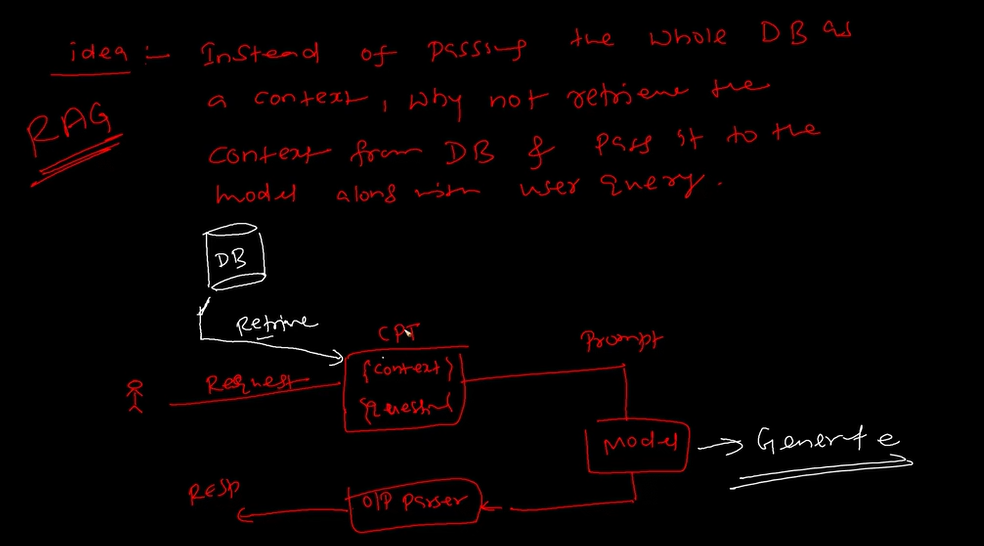

In [55]:
#----> In upper figure,place of retrive will make retrival system,this retrival system has connection with question(whatever user ask),
#      after that retrival system searching the relevant information from the database,after searching giving back relevant context 
#      to the retrival system,after that retrival system send to the CPT(chat prompt template) afetr that it will generate result.

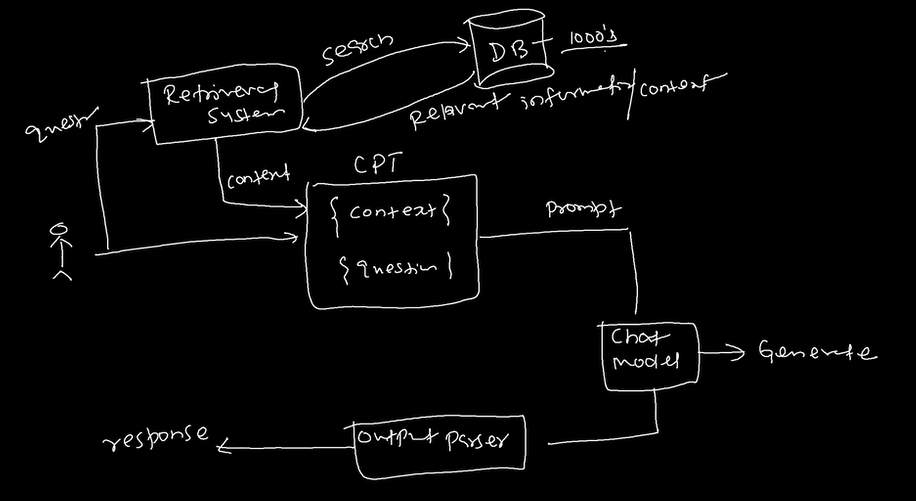

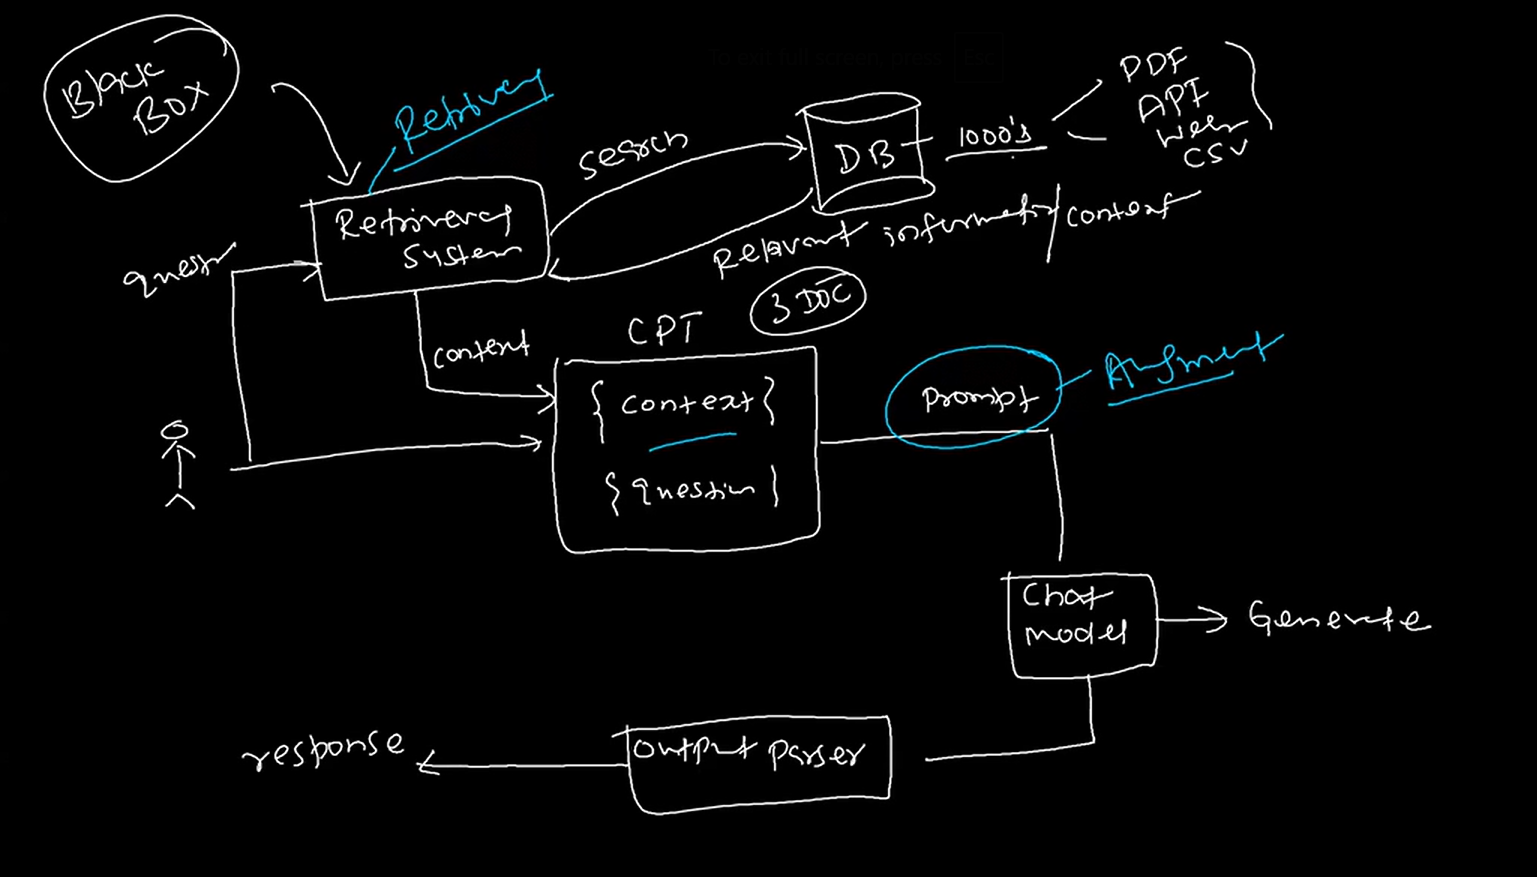

In [56]:
 # Retrieval-Augmented Generation

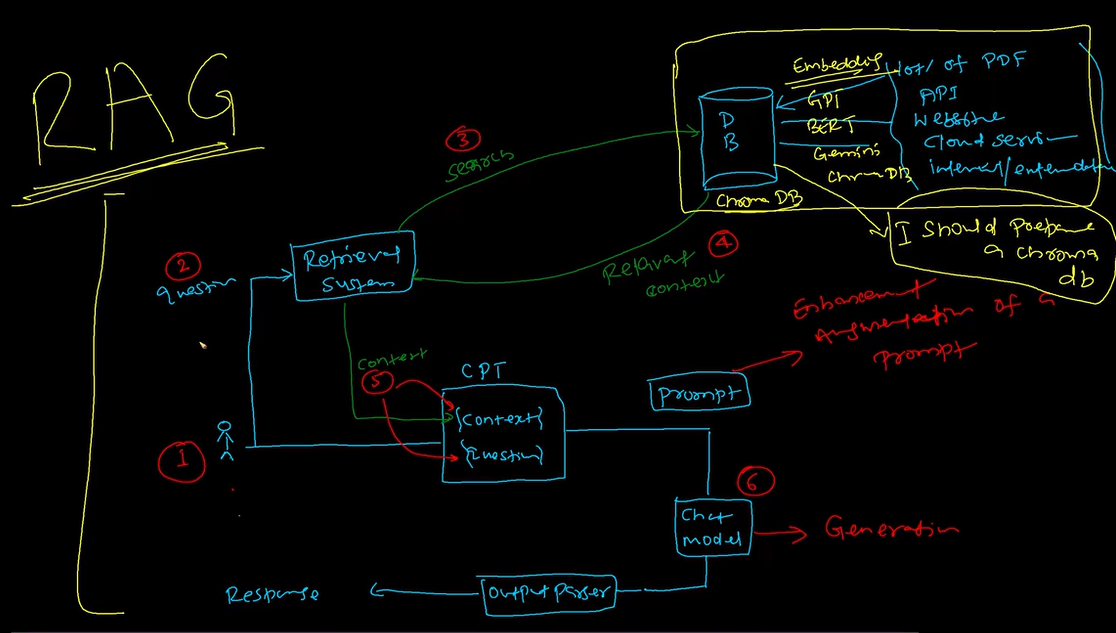

In [17]:
#---> Lots of Pdf,API,website,cloud etc is there so how you handle all these things(we can handle through Embedding).
#---> Embedding would be Gpt model,BERT Model,Gemini model,ChromaDB these are the technique there which can handle.

In [ ]:
# ---> Retrivel System work on optimize a RAG system(optimize the help of Fusuion method/context compulsion method)
# RAG Fusuion method/context compulsion method - In our db 1000 file is there related to user question,fusion will give 5 to 6 top best result out of 1000. Fusion is nothing its a re-ranking method.  

In [18]:
                        #### DataBase ####

In [2]:
# Raw data(pdf,API,website,csv,excel,sql,mongodb etc) ----> we have to store in one repository---->
# we have to do the chunking/Splitting to simplify the process--->Apply thr Embedding model---->convert into embedding----> 
# and everything store in vector AI(Chroma DB), This whole approach is called Indexing method.

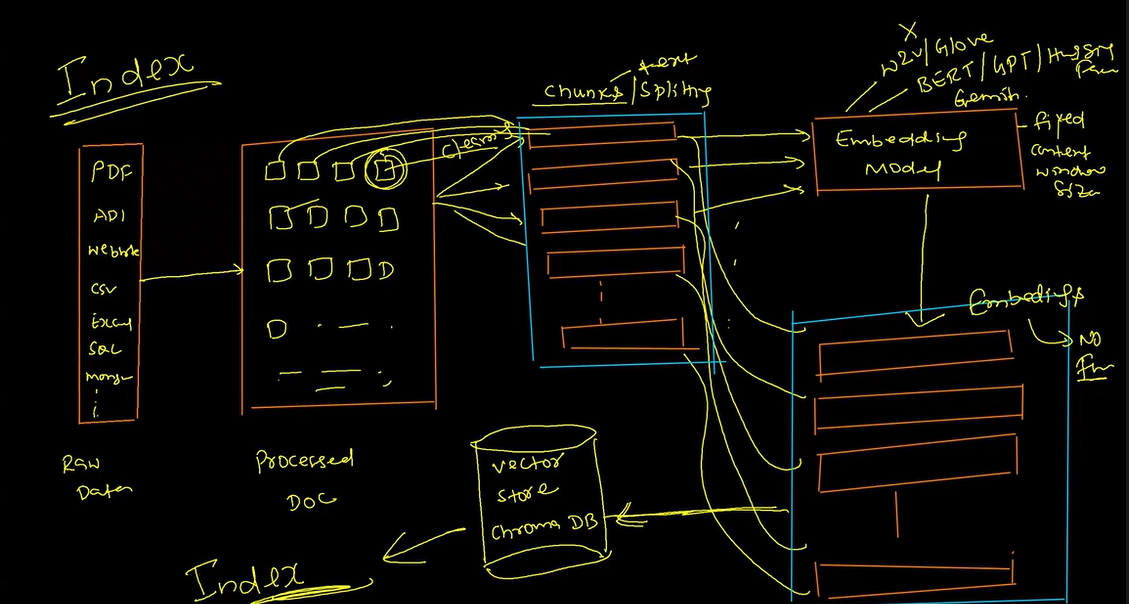

In [19]:
# ---> Index - Data from format like pdf,html,website etc are cleaned uo and converted to a plan text(Preprocessing),This text is 
#                then divided into a smallest part(chunk/split) and turned into vector representation by passing these chunks into the 
#                embedding model(Bert,gpt,gemini,huggingface,lama) to make it easier to find later. .

# **19th Oct (RAG (Introduction, Document Loaders, Chunking and Chroma DB))**

In [3]:
      ## when we can say Optimization :-
# (i) index (DB)
# (ii) user query(multi query)
# (iii) retrival approach (RAG Fusion,Context compulsion)

**Loading Data in different different format**

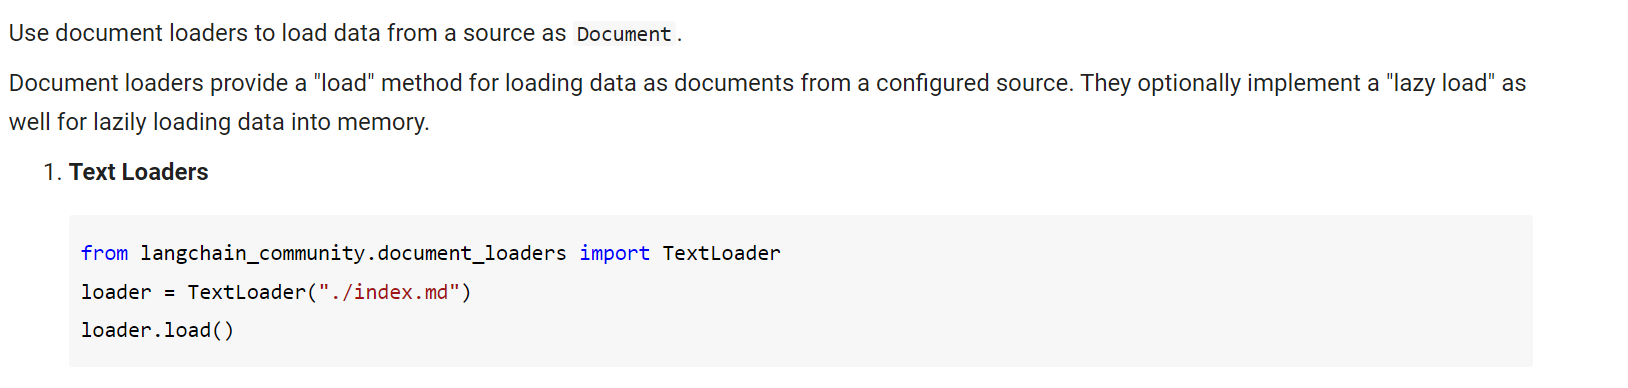

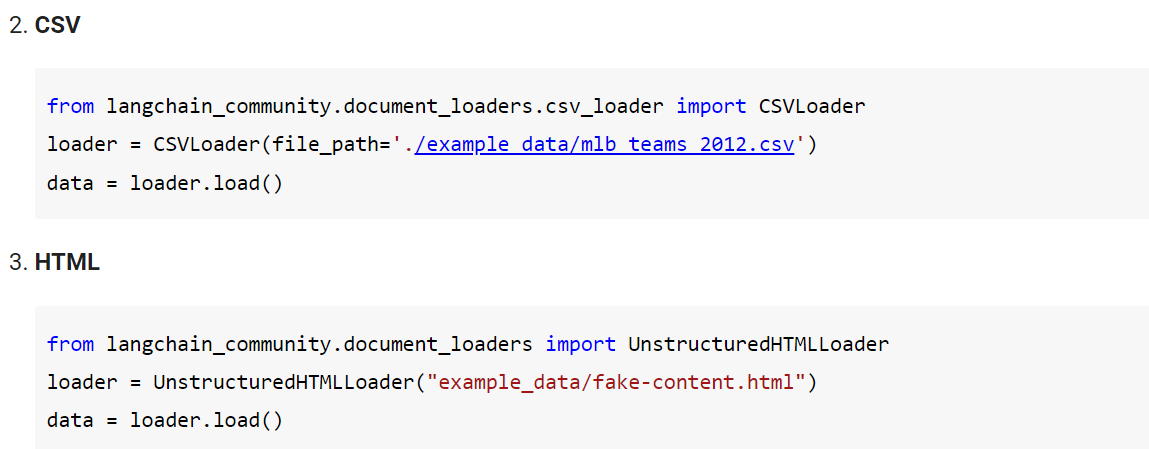

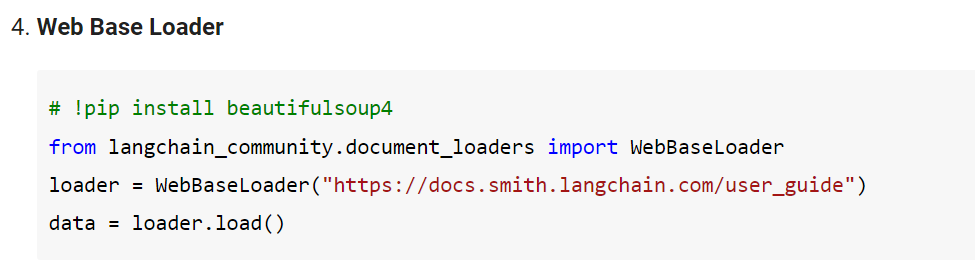

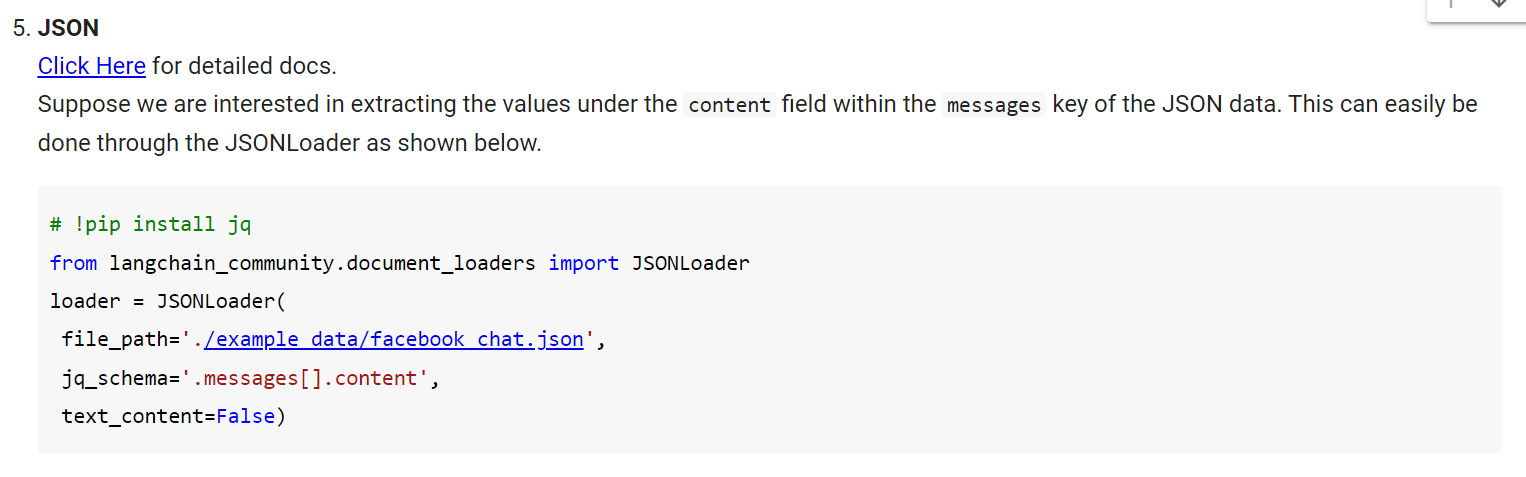

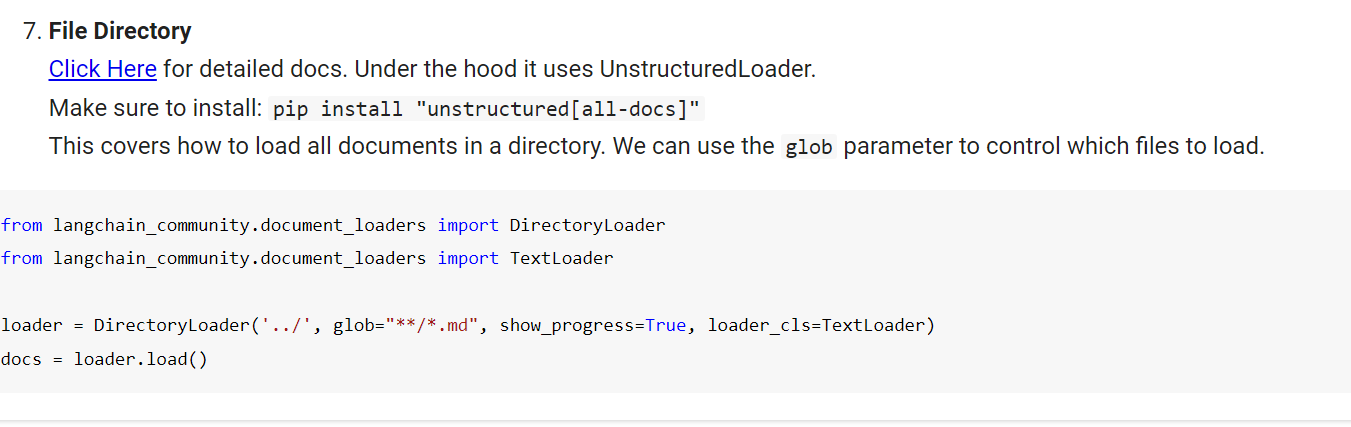

In [2]:
                  #### Import All the Library First ####
!pip install "unstructured[all-docs]"
!pip install jq
!pip install pypdf
!pip install pymupdf

**Loading one website**

In [9]:
# Web Base Loader
!pip install beautifulsoup4

In [10]:
from langchain_community.document_loaders import WebBaseLoader

In [11]:
loader = WebBaseLoader("https://www.thehindu.com/elections/maharashtra-assembly/mallikarjun-kharge-calls-bjp-the-biggest-enemy-of-farmers-slams-double-engine-government/article68779839.ece")
data = loader.load()

In [12]:
type(data)

list

In [13]:
len(data)

1

In [14]:
data[0]

Document(metadata={'source': 'https://www.thehindu.com/elections/maharashtra-assembly/mallikarjun-kharge-calls-bjp-the-biggest-enemy-of-farmers-slams-double-engine-government/article68779839.ece', 'title': '\n\tMallikarjun Kharge calls BJP the ‘biggest enemy’ of farmers, slams ‘double engine’ government - The Hindu\n', 'description': 'Congress president Kharge accuses BJP of harming Maharashtra farmers, calls for change ahead of Assembly elections. Nana Patole said that talks on 96 seats had been completed, with further discussions to take place with Sharad Pawar and Uddhav Thackeray.', 'language': 'en'}, page_content='\n\tMallikarjun Kharge calls BJP the ‘biggest enemy’ of farmers, slams ‘double engine’ government - The Hindu\n\n\n\n\n\n\n\n\n\nIndia\n\n\n\nWorld\n\n\n\nElections\n\n\n\nTechnology\n\n\n\ne-Paper\n\n\n\nMenu\n\n\n\n\n\n\n\nScience\n\n\n\n\nData\n\n\n\n\nHealth\n\n\n\n\nOpinion\n\n\n\nSEARCH\n\n\n\nFREE TRIALGIFT a Subscription\nSubscribe\nLOGIN\nACCOUNT\n\nPREMIUM\n\nO

In [15]:
print(data)

[Document(metadata={'source': 'https://www.thehindu.com/elections/maharashtra-assembly/mallikarjun-kharge-calls-bjp-the-biggest-enemy-of-farmers-slams-double-engine-government/article68779839.ece', 'title': '\n\tMallikarjun Kharge calls BJP the ‘biggest enemy’ of farmers, slams ‘double engine’ government - The Hindu\n', 'description': 'Congress president Kharge accuses BJP of harming Maharashtra farmers, calls for change ahead of Assembly elections. Nana Patole said that talks on 96 seats had been completed, with further discussions to take place with Sharad Pawar and Uddhav Thackeray.', 'language': 'en'}, page_content='\n\tMallikarjun Kharge calls BJP the ‘biggest enemy’ of farmers, slams ‘double engine’ government - The Hindu\n\n\n\n\n\n\n\n\n\nIndia\n\n\n\nWorld\n\n\n\nElections\n\n\n\nTechnology\n\n\n\ne-Paper\n\n\n\nMenu\n\n\n\n\n\n\n\nScience\n\n\n\n\nData\n\n\n\n\nHealth\n\n\n\n\nOpinion\n\n\n\nSEARCH\n\n\n\nFREE TRIALGIFT a Subscription\nSubscribe\nLOGIN\nACCOUNT\n\nPREMIUM\n\n

**Text Loader**

In [7]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(r"C:\Users\anasagar\Documents\LearnBay\GENERATIVEAI\18th + 21st Oct (RAG)\data\economy.txt")

data = loader.load()

In [8]:
print("Type of Data Variable: ", type(data))
print()
print("Number of Documents: ", len(data))
print()
print("Type of each datapoints:", type(data[0]))
print()
print("Metadata: ", data[0].metadata)
print()
print("Page Content:", data[0].page_content[:200])

Type of Data Variable:  <class 'list'>

Number of Documents:  1

Type of each datapoints: <class 'langchain_core.documents.base.Document'>

Metadata:  {'source': 'C:\\Users\\anasagar\\Documents\\LearnBay\\GENERATIVEAI\\18th + 21st Oct (RAG)\\data\\economy.txt'}

Page Content: Last month, when Indiaâ€™s National Security Adviser Ajit Doval met the Chinese Foreign Minister Wang Yi on the sidelines of the BRICS National Security Advisersâ€™ meeting in St. Petersburg, Russia, 


**Loading all .srt Files**

In [9]:
from langchain_community.document_loaders import DirectoryLoader

loader = DirectoryLoader(r"C:\Users\anasagar\Documents\LearnBay\GENERATIVEAI\18th + 21st Oct (RAG)\data", glob="*.srt", show_progress=True, loader_cls=TextLoader)
# .srt - .srt means we are uploading all the srt file at once

docs = loader.load()

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 317.20it/s]


In [10]:
print("Type of Data Variable: ", type(docs))

print("Number of Documents:", len(docs))

Type of Data Variable:  <class 'list'>
Number of Documents: 10


**Load .csv File**

In [35]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path=r"C:\Users\anasagar\Documents\LearnBay\GENERATIVEAI\18th + 21st Oct (RAG)\data\generative ai data.csv")

data = loader.load()

In [36]:
print("Type of loaded data:", type(data))

print("Number of datapoints:", len(data))

print("Type of each datapoints:", type(data[0]))

Type of loaded data: <class 'list'>
Number of datapoints: 436
Type of each datapoints: <class 'langchain_core.documents.base.Document'>


In [37]:
data[:5]

[Document(metadata={'source': 'C:\\Users\\anasagar\\Documents\\LearnBay\\GENERATIVEAI\\18th + 21st Oct (RAG)\\data\\generative ai data.csv', 'row': 0}, page_content="movieId: 1\ntitle: Toy Story (1995)\ngenres: ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']"),
 Document(metadata={'source': 'C:\\Users\\anasagar\\Documents\\LearnBay\\GENERATIVEAI\\18th + 21st Oct (RAG)\\data\\generative ai data.csv', 'row': 1}, page_content="movieId: 2\ntitle: Jumanji (1995)\ngenres: ['Adventure', 'Children', 'Fantasy']"),
 Document(metadata={'source': 'C:\\Users\\anasagar\\Documents\\LearnBay\\GENERATIVEAI\\18th + 21st Oct (RAG)\\data\\generative ai data.csv', 'row': 2}, page_content="movieId: 3\ntitle: Grumpier Old Men (1995)\ngenres: ['Comedy', 'Romance']"),
 Document(metadata={'source': 'C:\\Users\\anasagar\\Documents\\LearnBay\\GENERATIVEAI\\18th + 21st Oct (RAG)\\data\\generative ai data.csv', 'row': 3}, page_content="movieId: 6\ntitle: Heat (1995)\ngenres: ['Action', 'Crime', 'Thrille

**Step 1: Create an Index on available Knowledge Base**

In [ ]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import TextLoader
#i am uploading the text file

In [ ]:
from langchain_community.document_loaders import DirectoryLoader

loader = DirectoryLoader(r"C:\Users\anasagar\Documents\LearnBay\GENERATIVEAI\18th + 21st Oct (RAG)\data", glob="*.srt", show_progress=True, loader_cls=TextLoader)
# .srt - .srt means we are uploading all the srt file at once

docs = loader.load()

In [ ]:
print("Type of Data Variable: ", type(docs))

print("Number of Documents:", len(docs))

**Chunking/Splitting**

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
# chunk_overlap=50 (means repeated word will come,no worry about repeated word) 
chunks = text_splitter.split_documents(docs)

In [12]:
print("Number of Documents:", len(docs))
print()
print("Number of Chunks:", len(chunks))

Number of Documents: 10

Number of Chunks: 514


**import Model**

In [13]:
!pip install langchain_google_genai

In [29]:
import google.generativeai as palm
f = open('Gemini_API_key.txt')
key = f.read()
embedding_model = palm.configure(api_key=key)

**Chroma DB**

In [22]:
# !pip install langchain_chroma
# !pip install --upgrade langchain

In [23]:
# pip install chromadb
# !pip install chromadb

In [15]:
# from langchain.vectorstores import Chroma
from langchain.vectorstores import Chroma

In [31]:
# ! pip install langchain_chroma
# Initialize a ChromaDB Connection
from langchain_chroma import Chroma

# Initialize the database connection
# If database exist, it will connect with the collection_name and persist_directory
# Otherwise a new collection will be created
db = Chroma(collection_name="vector_database", 
            embedding_function=embedding_model, 
            persist_directory="./chroma_db_")

In [ ]:
db.add_documents(chunks)

In [ ]:
# we can check the already existing values
# We can check the already existing values
print(len(db.get()["ids"]))

**Step 2: Create a Retrieval**

In [ ]:
query = 'Who is Rachem?'

docs_chroma = db.similarity_search_with_score(query, k=3) # k=3(means 3 relevant/nearest values) 
# similarity_search_with_score means cosine somilarity
print(len(docs_chroma))

In [ ]:
context_text = "\n\n".join([doc.page_content for doc, _score in docs_chroma])
# here gives all relevant information/context
print(context_text)

**Step 3: Generation**

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

PROMPT_TEMPLATE = """
Answer the question based only on the following context:
{context}
Answer the question based on the above context: {question}.
Provide a detailed answer.
Don’t justify your answers.
Don’t give information not mentioned in the CONTEXT INFORMATION.
Do not say "according to the context" or "mentioned in the context" or similar.
"""

prompt_template = ChatPromptTemplate.from_template(PROMPT_TEMPLATE)

prompt = prompt_template.format(context=context_text, question=query)

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(api_key=key,model="gemini-1.5-flash")
response_text = model.invoke(prompt)

print(response_text.content)